In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(
    rc={
    'figure.figsize':(11.7,8.27),
    }
)

In [62]:
data = pd.read_csv("data/cebu_hh_survey_2011.txt", delim_whitespace=True)
# remove underscore
data['barangay'] = data.barangay.str.replace('_', ' ')
data.head()


,barangay,hh_id,hh_size,organic,paper,plastic,metal,others,total,av_kg_per_day,av_g_per_day
0,Capitol Site,H/H/1,7,5.25,2.25,2.25,0.0,0.0,9.75,1.39,"1,390"
1,Capitol Site,H/H/2,4,6.50,2.50,2.25,0.0,5.0,16.25,2.32,"2,320"
2,Capitol Site,H/H/3,6,6.50,2.00,2.00,0.0,7.0,17.50,2.50,"2,500"
3,Capitol Site,H/H/4,3,8.25,2.00,2.25,0.0,0.0,12.50,1.79,"1,790"
4,Capitol Site,H/H/5,9,9.00,2.00,2.00,0.0,0.0,13.00,1.86,"1,860"


In [63]:
demogs = pd.read_csv('data/demographics.txt')
demogs.head()

,barangay,geog_district,legislative_district,brgy_cap,pop_2015,pop_2010,chg,code,urban_or_rural
0,Adlaon,North,I,Nieves B. Narra,"4,028",3647.0,+10.45%,72217001,Rural
1,Agsungot,North,I,Pedro P. Damaolao,"2,290",1981.0,+15.60%,72217002,Rural
2,Apas,North,I,Virgil A. Cabigon,"24,591",22566.0,+8.97%,72217003,Urban
3,Babag,South,II,Cesar R. Dolorito,"4,452",4451.0,+0.02%,72217004,Rural
4,Bacayan,North,I,Zenaida E. Colina,"15,919",14021.0,+13.54%,72217006,Urban


In [64]:
merged = pd.merge(data, demogs[['barangay', 'pop_2010']], on = 'barangay', how= 'inner')
merged.head()

,barangay,hh_id,hh_size,organic,paper,plastic,metal,others,total,av_kg_per_day,av_g_per_day,pop_2010
0,Capitol Site,H/H/1,7,5.25,2.25,2.25,0.0,0.0,9.75,1.39,"1,390",2658.0
1,Capitol Site,H/H/2,4,6.50,2.50,2.25,0.0,5.0,16.25,2.32,"2,320",2658.0
2,Capitol Site,H/H/3,6,6.50,2.00,2.00,0.0,7.0,17.50,2.50,"2,500",2658.0
3,Capitol Site,H/H/4,3,8.25,2.00,2.25,0.0,0.0,12.50,1.79,"1,790",2658.0
4,Capitol Site,H/H/5,9,9.00,2.00,2.00,0.0,0.0,13.00,1.86,"1,860",2658.0


In [57]:
merged[['barangay', 'pop_2010']].drop_duplicates()

,barangay,pop_2010
0,Capitol Site,"2,658"
15,Sawang Calero,"7,831"
35,Mambaling,"32,162"
45,Ermita,"8,291"
65,Mabolo,"21,842"
75,Kamputhaw,"21,765"
88,Tinago,"6,554"
99,Quiot,"21,659"


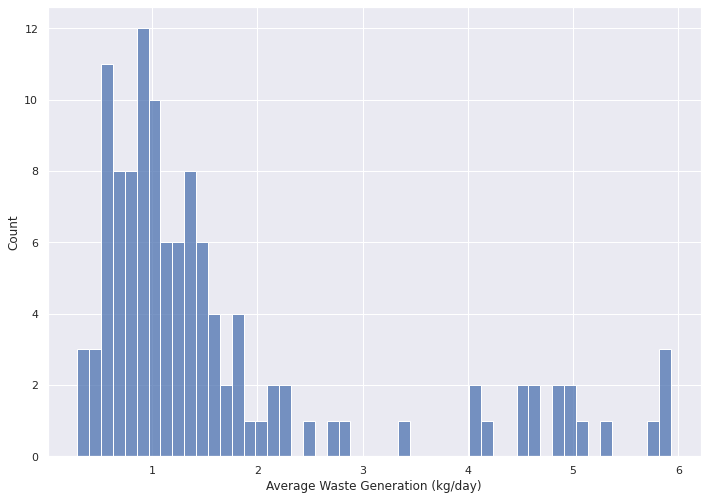

In [5]:
ax = sns.histplot(data=data, x = 'av_kg_per_day', bins = 50)
ax.set_xlabel('Average Waste Generation (kg/day)')
plt.show()

On average, organics comprise the highest waste generation

In [34]:
waste_type = waste_type.assign(
    sum_wt = lambda x: x.groupby(['barangay', 'waste_type'])['weight'].transform('sum'),
    wt_total_brgy = lambda x: x.groupby(['barangay'])['weight'].transform('sum'),
    pct = lambda x: x['sum_wt']/x['wt_total_brgy'] * 100
)

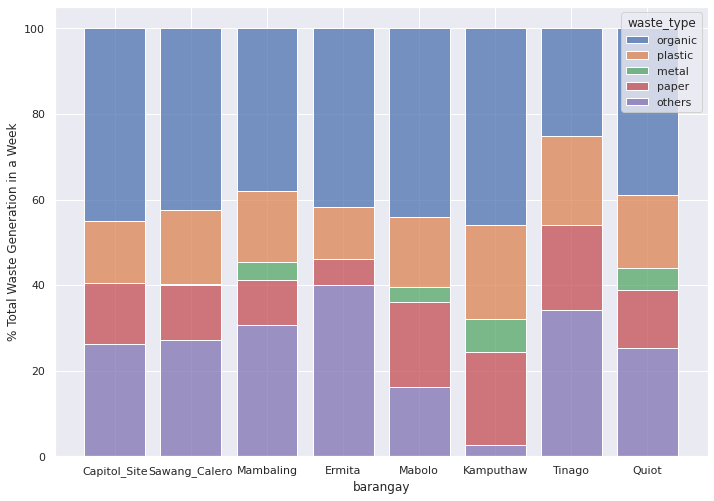

In [36]:
ax = sns.histplot(waste_type[['barangay', 'waste_type', 'pct']].drop_duplicates(), 
x = 'barangay', hue = 'waste_type', weights = 'pct', multiple='stack', shrink = 0.8)
ax.set_ylabel('% Total Waste Generation in a Week')
plt.show()


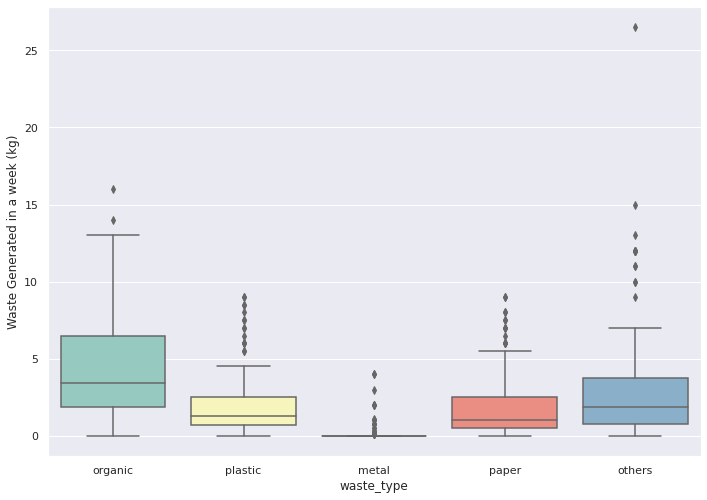

In [30]:
waste_type = pd.melt(data, id_vars = ['barangay', 'hh_id'],  
value_vars=['organic', 'plastic', 'metal', 'paper', 'others'], 
var_name = 'waste_type', value_name = 'weight')

ax = sns.boxplot(data = waste_type, x = 'waste_type', y= 'weight', palette = 'Set3')
ax.set_ylabel('Waste Generated in a week (kg)')
plt.show()

In [ ]:
waste_type

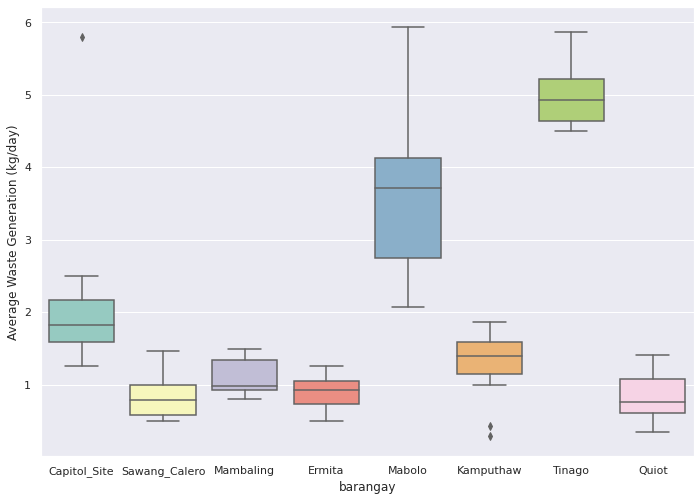

In [7]:
ax = sns.boxplot(data = data, x = 'barangay', y = 'av_kg_per_day', palette = 'Set3')
ax.set_ylabel('Average Waste Generation (kg/day)')
plt.show()

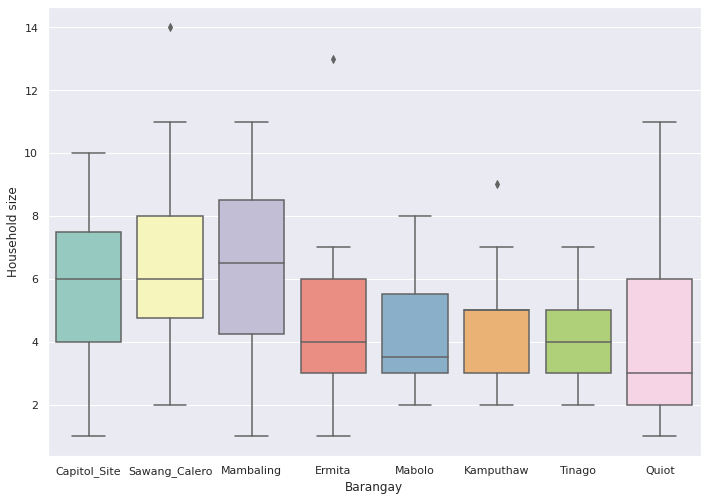

In [5]:
ax = sns.boxplot(data = data, x="barangay", y= 'hh_size', palette='Set3')
ax.set(xlabel = 'Barangay', ylabel = 'Household size')
plt.show()

We look at relating household size with with total waste generation. It seems that we can observe below that households from Tinago had higher waste generation despite their lower household sizes.

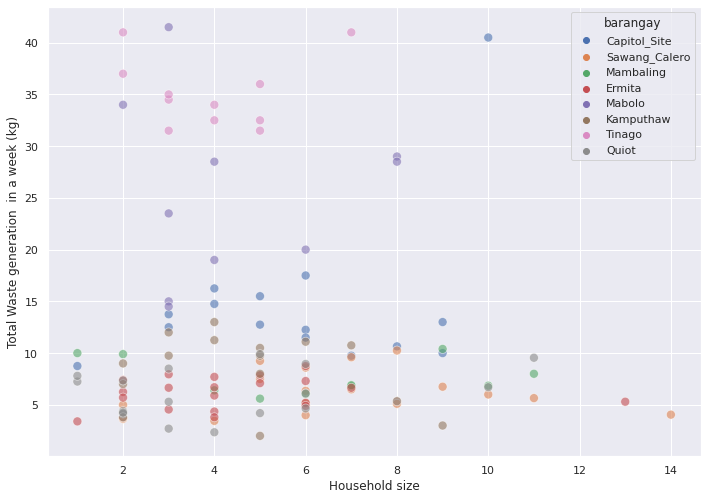

In [26]:
ax = sns.scatterplot(data = data, x = 'hh_size', y = 'total', hue = 'barangay', s= 80, alpha = 0.6)
ax.set(xlabel = 'Household size', ylabel = 'Total Waste generation  in a week (kg)')
plt.show()

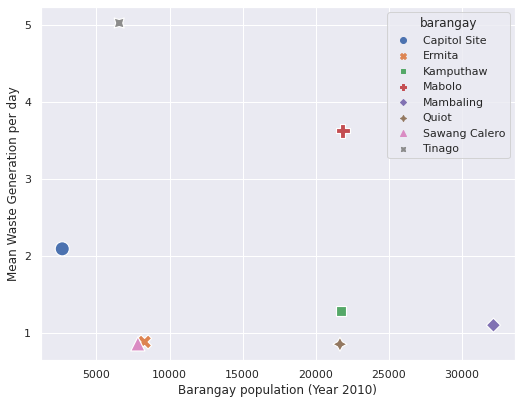

In [89]:
ave_waste_gen_brgy = merged.groupby(['barangay', 'pop_2010'])['av_kg_per_day'].mean().reset_index()
fig, ax = plt.subplots()
fig.set_size_inches(8.5,6.5)
sns.scatterplot(x = 'pop_2010',
 y= 'av_kg_per_day', 
 data = ave_waste_gen_brgy, 
 s = 200,
  hue = 'barangay',
  style = 'barangay')
ax.set_xlabel('Barangay population (Year 2010)')
ax.set_ylabel('Mean Waste Generation per day')
plt.show()